In [1]:
import signal_processing, data_load, learn, evaluate

Using TensorFlow backend.


In [2]:
num_rows = 45
num_columns = 2900
num_channels = 1

num_epochs = 10
num_batch_size = 121
num_speakers = 10

In [3]:
featuresdf = data_load.make_dataframe(num_speakers, './Dataset/wav/', num_rows, num_columns)

Finished feature extraction from  970  files


In [4]:
result_sets = data_load.make_train_test_sets(featuresdf, num_rows, num_columns, num_channels)
num_labels = result_sets[4]
model = learn.build_CNN_model(num_rows, num_columns, num_labels)

In [5]:
learn.compile(model) 

In [6]:
result_sets[1].shape

(194, 45, 2900, 1)

In [7]:
evaluate.evaluate_before_training(model, result_sets[0], result_sets[2])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 44, 2899, 16)      80        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 22, 1449, 16)      0         
_________________________________________________________________
dropout (Dropout)            (None, 22, 1449, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 21, 1448, 32)      2080      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 10, 724, 32)       0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 10, 724, 32)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 9, 723, 64)        8

In [8]:
history = learn.train_model(model, result_sets, num_epochs, num_batch_size, 'CNN2', 'default', 'CNN2')

Train on 776 samples, validate on 194 samples
Epoch 1/10
726/776 [===========================>..] - ETA: 3s - loss: 3.3465 - accuracy: 0.1006 
Epoch 00001: val_loss improved from inf to 2.49958, saving model to saved_models/weights.best.CNN2.hdf5
776/776 [==============================] - 65s 84ms/sample - loss: 3.2970 - accuracy: 0.1057 - val_loss: 2.4996 - val_accuracy: 0.0825
Epoch 2/10
726/776 [===========================>..] - ETA: 3s - loss: 2.4832 - accuracy: 0.1267 
Epoch 00002: val_loss improved from 2.49958 to 2.33240, saving model to saved_models/weights.best.CNN2.hdf5
776/776 [==============================] - 64s 83ms/sample - loss: 2.4710 - accuracy: 0.1314 - val_loss: 2.3324 - val_accuracy: 0.1031
Epoch 3/10
726/776 [===========================>..] - ETA: 3s - loss: 2.2698 - accuracy: 0.1667 
Epoch 00003: val_loss improved from 2.33240 to 2.31488, saving model to saved_models/weights.best.CNN2.hdf5
776/776 [==============================] - 61s 79ms/sample - loss: 2.2752

In [9]:
import evaluate
evaluate.evaluate_model(model, 'CNN2', result_sets)

Training Accuracy:  0.41623712
Testing Accuracy:  0.4072165


In [11]:
evaluate.display_metrics(model, 'CNN2', result_sets)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        16
           1       0.48      0.89      0.63        18
           2       0.61      0.51      0.56        43
           3       0.00      0.00      0.00        20
           4       0.00      0.00      0.00        13
           5       0.65      0.43      0.52        30
           6       0.27      1.00      0.43        14
           7       0.25      0.81      0.39        16
           8       0.50      0.08      0.14        12
           9       0.00      0.00      0.00        12

    accuracy                           0.41       194
   macro avg       0.28      0.37      0.27       194
weighted avg       0.35      0.41      0.33       194

Confusion matrix: 
[[ 0  0  0  1  0  6  0  9  0  0]
 [ 0 16  2  0  0  0  0  0  0  0]
 [ 0 16 22  0  0  0  1  4  0  0]
 [ 0  0  2  0  0  1  7 10  0  0]
 [ 0  0  5  0  0  0  5  2  1  0]
 [ 0  1  2  0  0 13  8  6  0  0]
 [ 0  0  0  0  0  0 14  

C:\Users\Maria\Anaconda3\envs\project\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


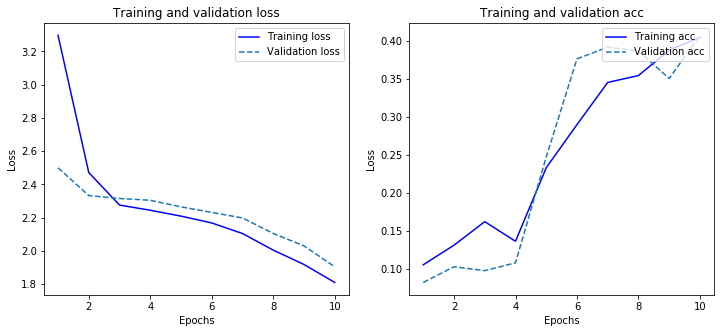

In [12]:
evaluate.plot_history(history)

In [13]:
modelReg = learn.build_regularized_CNN_model(num_rows, num_columns, num_labels)
learn.compile(modelReg)
reg_history= learn.train_model(modelReg, result_sets, num_epochs, num_batch_size, 'CNN2Reg', 'regularization', 'CNN2Reg')

Train on 776 samples, validate on 194 samples
Epoch 1/10
726/776 [===========================>..] - ETA: 3s - loss: 3.7183 - accuracy: 0.1322 
Epoch 00001: val_loss improved from inf to 3.48252, saving model to saved_models/weights.best.CNN2Reg.hdf5
776/776 [==============================] - 62s 81ms/sample - loss: 3.7076 - accuracy: 0.1302 - val_loss: 3.4825 - val_accuracy: 0.1649
Epoch 2/10
726/776 [===========================>..] - ETA: 3s - loss: 3.4417 - accuracy: 0.1791 
Epoch 00002: val_loss improved from 3.48252 to 3.42676, saving model to saved_models/weights.best.CNN2Reg.hdf5
776/776 [==============================] - 61s 79ms/sample - loss: 3.4383 - accuracy: 0.1843 - val_loss: 3.4268 - val_accuracy: 0.0928
Epoch 3/10
726/776 [===========================>..] - ETA: 3s - loss: 3.3409 - accuracy: 0.2631 
Epoch 00003: val_loss improved from 3.42676 to 3.32945, saving model to saved_models/weights.best.CNN2Reg.hdf5
776/776 [==============================] - 60s 78ms/sample - los

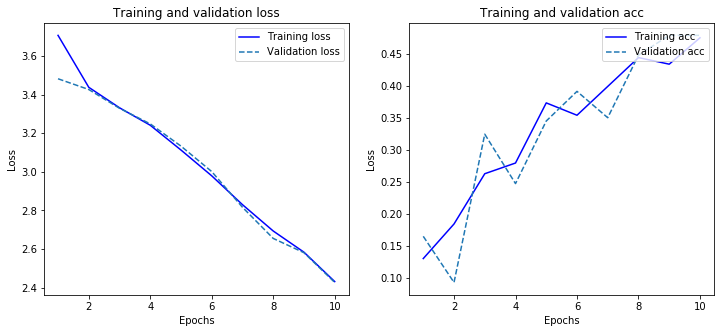

In [14]:
evaluate.plot_history(reg_history)

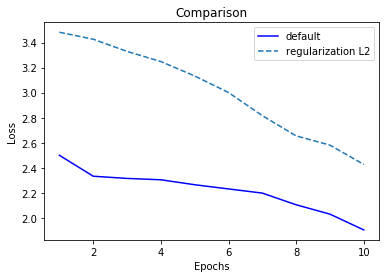

In [15]:
evaluate.plot_compared_val_loss(history, reg_history, 'default', 'regularization L2')